In [1]:
import pandas as pd
import numpy as np
# import pylab as pl
import matplotlib.pyplot as plt
from IPython import get_ipython
plt.style.use('ggplot')
get_ipython().run_line_magic('matplotlib', 'inline')
# import seaborn as sns

In [2]:
dataframe = pd.read_csv("ORGANICS.csv", encoding="cp1251")

In [3]:
dataframe.head()

,п»їID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
#Параметры
oneTree = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')


In [6]:
df3 = dataframe.dropna()
df3['TargetBuy'].replace([0,1],['No','Buy'], inplace=True)

x=df3[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df3.values[::,11]

c:\users\edgar\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
oneTree.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [9]:
predict100 = oneTree.predict(X_test)

In [10]:
predict100

array(['No', 'No', 'Buy', ..., 'No', 'No', 'No'], dtype=object)

In [11]:
prob = oneTree.predict_proba(X_test)[:, 1]

In [12]:
prob

array([0.97, 0.93, 0.42, ..., 0.59, 0.74, 0.95])

In [13]:
from sklearn.metrics import roc_auc_score



In [14]:
roc_value = roc_auc_score(y_test, prob)

In [15]:
roc_value

0.7723116889124383

In [16]:
import matplotlib.pyplot as plt

In [17]:
elevenTree = RandomForestClassifier(n_estimators=11, 
                               bootstrap = True,
                               max_features = 'sqrt')
elevenTree.fit(X_train, y_train)
predict11 = elevenTree.predict(X_test)
predict11

array(['No', 'No', 'Buy', ..., 'Buy', 'No', 'No'], dtype=object)

In [18]:
prob11 = elevenTree.predict_proba(X_test)[:, 1]
prob11

array([1.        , 0.90909091, 0.45454545, ..., 0.45454545, 0.63636364,
       1.        ])

In [19]:
roc_value11 = roc_auc_score(y_test, prob11)

In [20]:
roc_value11

0.7377160447102162

In [21]:
Tree21 = RandomForestClassifier(n_estimators=21, 
                               bootstrap = True,
                               max_features = 'sqrt')
Tree21.fit(X_train, y_train)
predict21 = Tree21.predict(X_test)
predict21



array(['No', 'No', 'Buy', ..., 'Buy', 'No', 'No'], dtype=object)

In [22]:
prob21 = Tree21.predict_proba(X_test)[:, 1]
prob21

array([0.9047619 , 0.95238095, 0.28571429, ..., 0.47619048, 0.66666667,
       0.95238095])

In [23]:
roc_value21 = roc_auc_score(y_test, prob21)
roc_value21

0.7562852715329818

In [24]:
Tree301 = RandomForestClassifier(n_estimators=301, 
                               bootstrap = True,
                               max_features = 'sqrt')
Tree301.fit(X_train, y_train)
predict301 = Tree301.predict(X_test)
predict301

array(['No', 'No', 'Buy', ..., 'No', 'No', 'No'], dtype=object)

In [25]:
prob301 = Tree301.predict_proba(X_test)[:, 1]
prob301

array([0.93355482, 0.87707641, 0.3654485 , ..., 0.63953488, 0.71096346,
       0.96345515])

In [26]:
roc_value301 = roc_auc_score(y_test, prob301)
roc_value301

0.7732750065181373

In [27]:
Tree1000 = RandomForestClassifier(n_estimators=1000, 
                               bootstrap = True,
                               max_features = 'sqrt')
Tree1000.fit(X_train, y_train)
predict1000 = Tree1000.predict(X_test)
predict1000

array(['No', 'No', 'Buy', ..., 'No', 'No', 'No'], dtype=object)

In [28]:
prob1000 = Tree1000.predict_proba(X_test)[:, 1]
prob1000
roc_value1000 = roc_auc_score(y_test, prob1000)
roc_value1000

0.7752163601039538

In [29]:
Tree500 = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')
Tree500.fit(X_train, y_train)
predict500 = Tree500.predict(X_test)
predict500

array(['No', 'No', 'Buy', ..., 'No', 'No', 'No'], dtype=object)

In [30]:
prob500 = Tree500.predict_proba(X_test)[:, 1]
roc_value500 = roc_auc_score(y_test, prob500)
roc_value500

0.7745458330179397

In [34]:
xlist = [11, 21, 100, 301, 500, 1000]

In [35]:
yList = [0.7423013905810193, 0.7539829727778401, 0.7684460851551675, 0.7709106882914785, 0.7710192902133535, 0.7711834382827081]

<function matplotlib.pyplot.show(close=None, block=None)>

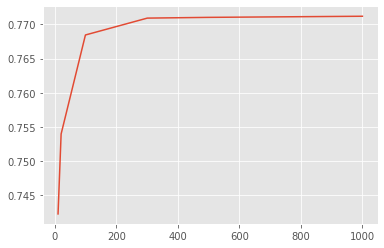

In [36]:
plt.plot(xlist, yList)
plt.show